# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
-0.001
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.003
-0.004
-0.004
-0.003
-0.001
-0.001
-0.002
-0.003
1.0
1.001
0.999
1.0
1.996
1.999
2.002
1.999
2.001
2.974
2.978
2.979
2.979
2.981
3.98
3.98
3.979
3.978
4.974
4.974
4.973
4.973
5.967
5.967
5.967
5.967
6.644
6.649
6.649
6.649
7.313
7.313
7.313
7.314
8.314
8.314
8.314
8.313
9.31
9.318
9.317
9.317
9.317
10.322
10.322
10.322
10.321
11.317
11.324
11.324
11.322
11.324
12.303
12.31
12.31
12.31
12.309
13.305
13.31
13.31
13.31
14.013
14.015
14.017
14.017
14.018
14.728
14.728
14.726
14.728
15.723
15.722
15.722
15.722
16.718
16.718
16.718
16.718
17.712
17.718
17.718
17.718
17.72
18.72
18.72
18.72
18.72
19.714
19.714
19.714
19.714
20.716
20.716
20.716
20.715
21.717
21.716
21.716
22.218
22.218
22.218
22.725
22.724
22.723
22.723
23.717
23.718
23.718
23.717
24.721
24.72
24.719
24.719
25.723
25.722
25.721
25.721
26.724
26.723
26.721
26.721
27.725
27.725
27.724
27.724
28.726
28.726
28.724
28.726
29.562
29.5

57.215
57.217
57.217
57.217
57.216
57.216
57.216
57.216
57.216
57.216
57.216
57.216
57.216
57.216
57.214
57.211
57.211
57.211
57.213
57.211
57.412
57.415
57.42
57.421
57.419
57.421
57.417
57.443
57.443
57.441
57.442
57.44
57.439
57.439
57.441
57.436
57.44
57.442
57.438
57.447
57.431
57.434
57.435
57.444
57.443
57.441
57.44
57.434
57.865
57.865
57.865
57.863
57.861
57.861
57.848
58.311
58.351
58.351
58.349
58.352
58.352
58.339
58.339
58.346
58.616
58.657
58.656
58.656
58.656
58.656
58.651
58.651
58.826
58.864
58.864
58.87
58.867
58.858
59.046
59.043
59.052
59.052
59.053
59.05
59.043
59.044
59.05
59.19
59.223
59.223
59.222
59.225
59.221
59.214
59.211
59.221
59.219
59.217
59.216
59.22
59.213
59.214
59.221
59.222
59.222
59.217
59.223
59.223
59.222
59.222
59.221
59.22
59.22
59.22
59.22
59.221
59.221
59.221
59.221
59.221
59.217
59.214
59.214
59.218
59.218



KeyboardInterrupt



In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1322,2644,59.217
1323,2646,59.214
1324,2648,59.214
1325,2650,59.218


<IPython.core.display.Javascript object>


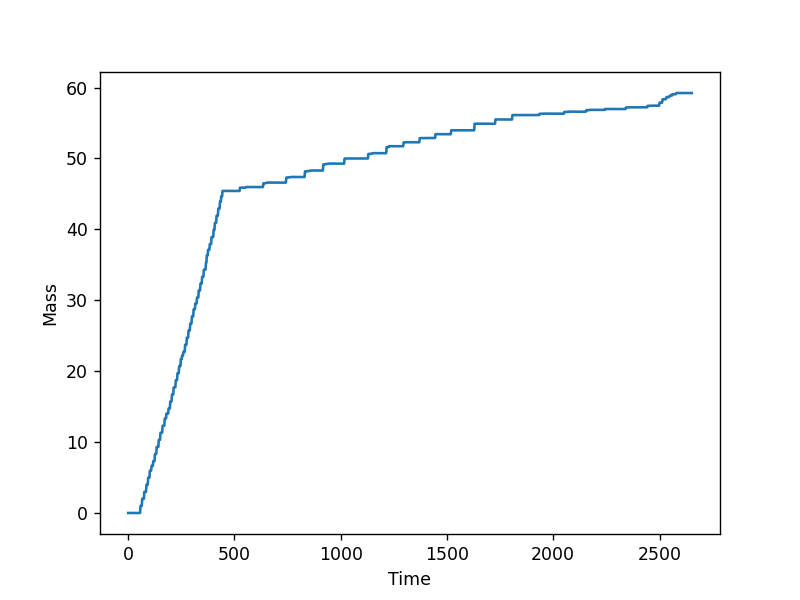

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_010823_S709-714.csv')